In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
times = pd.read_csv("times.csv")
times

,problem,V,E,ratio,time
0,1,150,150,1,19329134
1,2,150,150,1,37448046
2,3,150,150,1,27875422
3,1,150,300,2,19280887
4,2,150,300,2,32983635
...,...,...,...,...,...
58,2,750,1500,2,4408680175
59,3,750,1500,2,8277725414
60,1,750,2244,3,583477533
61,2,750,2244,3,3531588126


In [3]:
times1 = times[times["problem"] == 1]
times2 = times[times["problem"] == 2]
times3 = times[times["problem"] == 3]

In [4]:
times1

,problem,V,E,ratio,time
0,1,150,150,1,19329134
3,1,150,300,2,19280887
6,1,150,444,3,20439309
9,1,250,250,1,61774738
12,1,250,500,2,60569762
15,1,250,744,3,59996881
18,1,350,350,1,112840530
21,1,350,700,2,115637116
24,1,350,1044,3,114483651
27,1,450,450,1,188239292


In [5]:
times1_constant = 0
times1_filtered = times1[times1["ratio"] == 1]
for i in range(len(times1_filtered) - 1):
    times1_constant += times1_filtered.iloc[i + 1]["time"] / times1_filtered.iloc[i]["time"]
times1_constant /= len(times1_filtered) - 1

In [6]:
times2

,problem,V,E,ratio,time
1,2,150,150,1,37448046
4,2,150,300,2,32983635
7,2,150,444,3,35729283
10,2,250,250,1,136744507
13,2,250,500,2,135792378
16,2,250,744,3,132327747
19,2,350,350,1,367762356
22,2,350,700,2,352469051
25,2,350,1044,3,353068191
28,2,450,450,1,872470800


In [7]:
times2_constant = 0
times2_filtered = times2[times2["ratio"] == 1]
for i in range(len(times2_filtered) - 1):
    times2_constant += times2_filtered.iloc[i + 1]["time"] / times2_filtered.iloc[i]["time"]
times2_constant /= len(times2_filtered) - 1

In [8]:
times3

,problem,V,E,ratio,time
2,3,150,150,1,27875422
5,3,150,300,2,41303988
8,3,150,444,3,11922829
11,3,250,250,1,34652101
14,3,250,500,2,790413972
17,3,250,744,3,31689801
20,3,350,350,1,1869042840
23,3,350,700,2,3982419812
26,3,350,1044,3,327314560
29,3,450,450,1,10902764037


In [9]:
times3_constant = 0
times3_filtered = times3[times3["ratio"] == 1]
for i in range(len(times3_filtered) - 1):
    times3_constant += times3_filtered.iloc[i + 1]["time"] / times3_filtered.iloc[i]["time"]
times3_constant /= len(times3_filtered) - 1

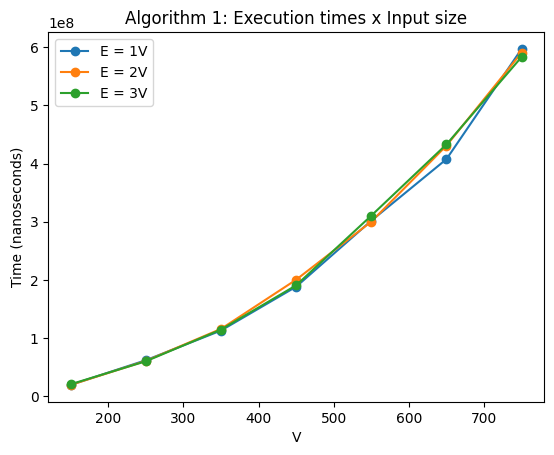

In [10]:
for ratio, group in times1.groupby('ratio'):
    plt.plot(group["V"], group["time"], marker="o", label=f"E = {ratio}V")

plt.legend()
plt.xlabel("V")
plt.ylabel("Time (nanoseconds)")
plt.title("Algorithm 1: Execution times x Input size")
plt.show()

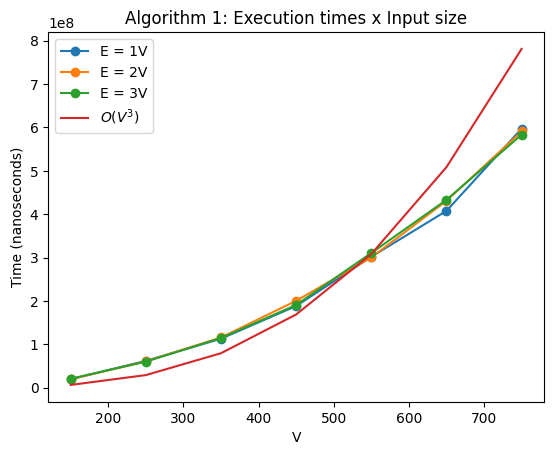

In [11]:
n_sizes = times1["V"].unique()

for ratio, group in times1.groupby('ratio'):
    plt.plot(group["V"], group["time"], marker="o", label=f"E = {ratio}V")

plt.plot(n_sizes, times1_constant * np.power(n_sizes, 3), label="$O(V^3)$")

plt.legend()
plt.xlabel("V")
plt.ylabel("Time (nanoseconds)")
plt.title("Algorithm 1: Execution times x Input size")
plt.show()

In [12]:
print(times1_constant)

1.8516580695151674


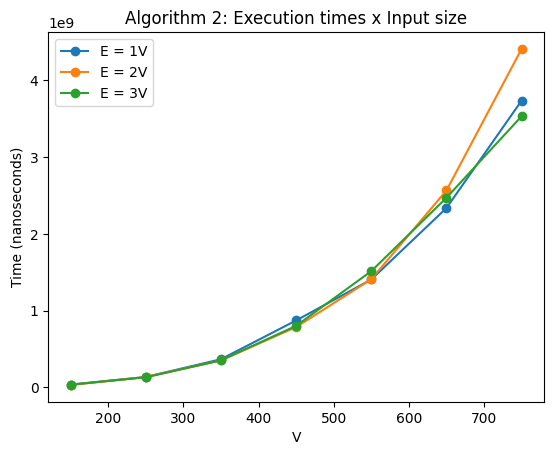

In [13]:
for ratio, group in times2.groupby('ratio'):
    plt.plot(group["V"], group["time"], marker="o", label=f"E = {ratio}V")

plt.legend()
plt.xlabel("V")
plt.ylabel("Time (nanoseconds)")
plt.title("Algorithm 2: Execution times x Input size")
plt.show()

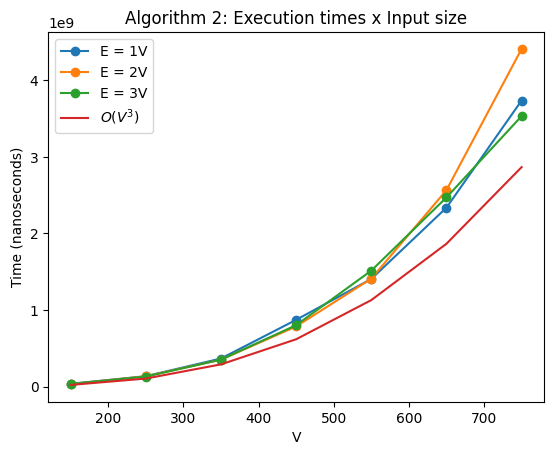

In [14]:
n_sizes = times2["V"].unique()

for ratio, group in times2.groupby('ratio'):
    plt.plot(group["V"], group["time"], marker="o", label=f"E = {ratio}V")

plt.plot(n_sizes, 3 * times2_constant * np.power(n_sizes, 3), label="$O(V^3)$")

plt.legend()
plt.xlabel("V")
plt.ylabel("Time (nanoseconds)")
plt.title("Algorithm 2: Execution times x Input size")
plt.show()

In [15]:
print(3 * times2_constant)

6.792694101633552


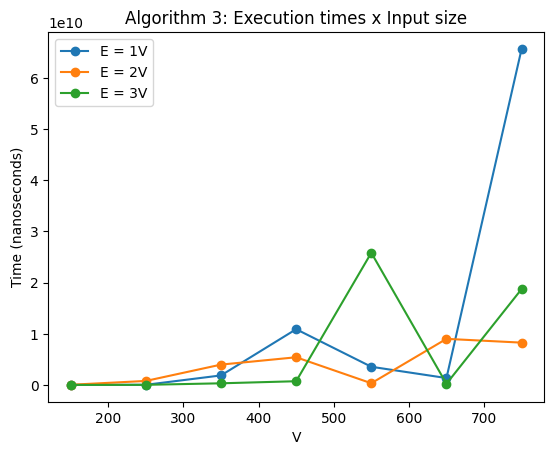

In [16]:
for ratio, group in times3.groupby('ratio'):
    plt.plot(group["V"], group["time"], marker="o", label=f"E = {ratio}V")

plt.legend()
plt.xlabel("V")
plt.ylabel("Time (nanoseconds)")
plt.title("Algorithm 3: Execution times x Input size")
plt.show()

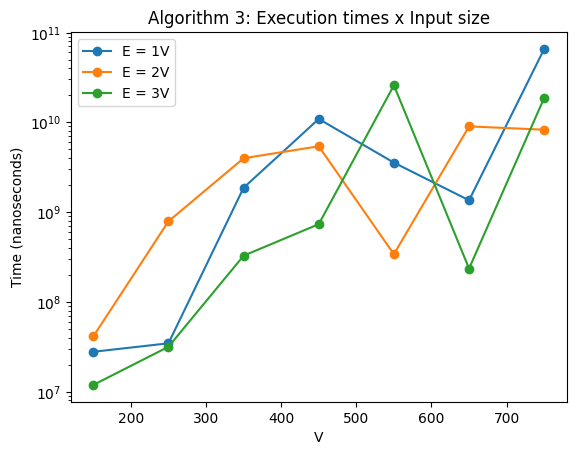

In [17]:
for ratio, group in times3.groupby('ratio'):
    plt.plot(group["V"], group["time"], marker="o", label=f"E = {ratio}V")


plt.legend()
plt.xlabel("V")
plt.ylabel("Time (nanoseconds)")
plt.yscale("log")
plt.title("Algorithm 3: Execution times x Input size")
plt.show()